In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# step 1: check out data/dataset_description.txt 
df = pd.read_csv('data/train.csv')

print(df.head())

df.drop(columns=['Id'],inplace=True) # unique ID, not relevant for the ML model

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2  \
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
# step 2: number of rows and columns
df.shape # (nr_samples, nr_features)

(1460, 80)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


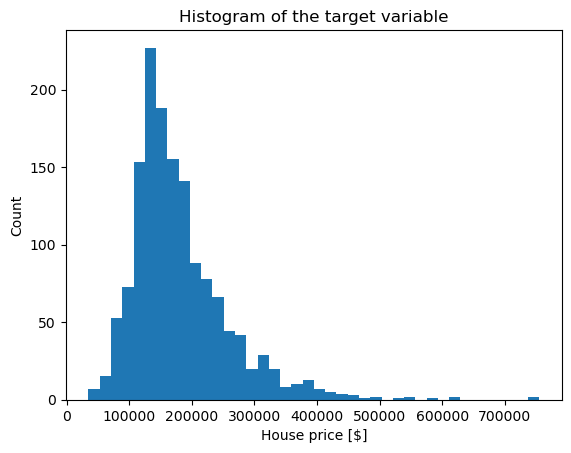

In [4]:
# step 3: the target variable
y = df['SalePrice'] # the target variable
X = df.loc[:, df.columns != 'SalePrice'] # the remaining features

print(y.describe())

plt.hist(y,bins=40)
plt.title('Histogram of the target variable')
plt.xlabel('House price [$]')
plt.ylabel('Count')
plt.show()

In [5]:
# step 4: missing values
# While missing values are represented with NaN in this dataset, 
# this might not be true for your dataset!
# Sometimes missing values are represented by peculiar values or strings 
# such as 'missing', 'unknown', -999, '?'.
# You either need to modify my code to work with the peculiar values 
# or you need to replace the peculariar values with np.nan before running my code.

print('data dimensions:',df.shape) # just a reminder

perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (1460, 80)
fraction of missing values in features:
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
fraction of points with missing values: 1.0


In [6]:
# step 5: summary stats of each column

print(pd.unique(X.dtypes)) # the unique data types in the data frame

for column in X:
    
    if X[column].dtype == object: # object usually means string
        print(X[column].value_counts())
        
    else: # if not object, it's numerical (int or float)
        print(X[column].describe())

[dtype('int64') dtype('O') dtype('float64')]
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk    